# Language Selection

The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.


© Explore Data Science Academy

In [3]:
# import relevant libraries
import nltk
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
pd.set_option('display.max_rows', 100)
from sklearn.utils import resample
from sklearn.pipeline import Pipeline


from nltk.corpus import stopwords
from sklearn.metrics import classification_report

# set plot style
# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud


# Loading the data

Getting the Training and Testing data

In [4]:
# Loading Data
df_train = pd.read_csv('C:/Users/Mpilenhle/Desktop/Hackathon/train_set.csv')
df_test = pd.read_csv('C:/Users/Mpilenhle/Desktop/Hackathon/test_set.csv')

In [5]:
# looking at data shape
df_train.shape

(33000, 2)

In [6]:
# looking at the data frame
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [7]:
df_test.shape

(5682, 2)

In [8]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [9]:
df_train['lang_id'].value_counts().index

Index(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot',
       'afr'],
      dtype='object')

# Looking at the data distribution of the Classes

Looking at the data distribution there is a balance in the data

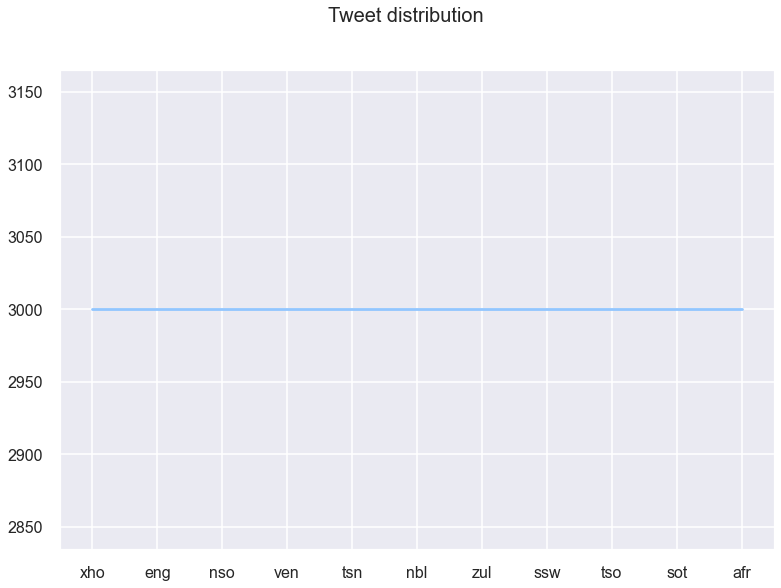

In [10]:
# Display target distribution
style.use('seaborn-pastel')
plt.plot(df_train['lang_id'].value_counts())

labels= ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot',
       'afr']

plt.suptitle('Tweet distribution', fontsize=20)
plt.show()

# Train Test split with and Vectorising

The splitting of data so as to get the validation data, to make sure our tests are validated, and using the tfidf we can tranform the data to numeric (float) so the model can be able to train on it.

In [11]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

 
# X -> features, y -> label
y =  df_train['lang_id']
X =  df_train['text']

# dividing X, y into train and test data
up_X_train, up_X_test, up_y_train, up_y_test = train_test_split(X, y, 
                                random_state = 42)


# extracting features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
up_V_train_X = vectorizer.fit_transform(up_X_train)
up_V_test_X = vectorizer.transform(up_X_test)


# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()


# Scale data
X_train_scaled = scaler.fit_transform(up_V_train_X)
x_test_scaled = scaler.transform(up_V_test_X)


## Training the model 
 
 By using different models we can get the priviledge of comparing the different perfomance, of each model

In [49]:
# training a linear SVM classifier
from sklearn.svm import LinearSVC
svm_model_linear = SVC(kernel = 'linear').fit(up_V_train_X, up_y_train)
final_svm_predictions = svm_model_linear.predict(up_V_test_X)


In [50]:
print('Classification Report SVM')
print(classification_report(up_y_test, svm_predictions))

Classification Report SVM
              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       754
         eng       1.00      1.00      1.00       762
         nbl       0.99      0.99      0.99       734
         nso       1.00      0.99      1.00       782
         sot       1.00      1.00      1.00       759
         ssw       1.00      1.00      1.00       732
         tsn       1.00      1.00      1.00       746
         tso       1.00      1.00      1.00       700
         ven       1.00      1.00      1.00       785
         xho       0.99      1.00      0.99       761
         zul       0.98      0.99      0.99       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



In [13]:
#importing linearSVC
from sklearn.svm import LinearSVC

In [14]:
# Linear Support Vector Classifier with TfidfVectorizer

lsvc = Pipeline([('tfidf', TfidfVectorizer(ngram_range = (1,3))), 
                 
                 ('lsvc', LinearSVC(C = 5, class_weight ='balanced',
                                  max_iter = 8000))])

# Train model
lsvc.fit(up_X_train, up_y_train)


In [56]:
linear_pred = lsvc.predict(up_X_test)

In [57]:
print('Classification Report LinearSVM')
print(classification_report(up_y_test, linear_pred))

Classification Report LinearSVM
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       754
         eng       1.00      1.00      1.00       762
         nbl       0.99      0.99      0.99       734
         nso       1.00      1.00      1.00       782
         sot       1.00      1.00      1.00       759
         ssw       1.00      1.00      1.00       732
         tsn       1.00      1.00      1.00       746
         tso       1.00      1.00      1.00       700
         ven       1.00      1.00      1.00       785
         xho       0.99      0.99      0.99       761
         zul       0.99      0.99      0.99       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250



# Hyper parameter tuning

Getting the 

In [ ]:
# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler ()
# Scale data
tX_train_scaled = scaler.fit_transform(up_V_train_Xf)
tX_test_scaled = scaler.transform(up_V_test_Xf)

In [64]:
# Import Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# number of folds to be tested on
nfolds = 2

# the values of c to check for
Cs = [0.001, 0.01, 0.1, 1, 10]

# the values of gamma
gammas = [0.001, 0.01, 0.1, 1]

# Creating the parameters dictionary
param_grid = {
    'C'     : Cs,
    'gamma' : gammas
    }

# Applying the grid search and comparing based on the f1 score
grid_SVM = GridSearchCV(SVC(kernel='linear'), param_grid, scoring='f1', cv=nfolds)
grid_SVM.fit(up_V_train_X, up_y_train)

# Getting the best parameters of grid search
grid_SVM.best_params_


{'C': 0.001, 'gamma': 0.001}

# Best Feature Selection

In [ ]:
# Import the feature selector module
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

# Set up selector, choosing score function and number of features to retain
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k= 40)


# Transform (i.e.: run selection on) the training data
X_train_kbest = selector_kbest.fit_transform(V_train_X, y_train)

# Fit model to the transformed data
SVM_k_best = SVC(kernel='linear', degree=0.001, C=0.001).fit(X_train_kbest, y_train)


# Before generating predictions, we'll need to transform the test data the same way we did the train data
X_test_kbest = selector_kbest.transform(V_test_X)

# Generate predictions from var thresh model
pred_lm_kbest = SVM_k_best.predict(X_test_kbest)


#rbf_pred = rbf.predict(V_test_X)
print('Classification Report poly_pred ')
print(classification_report(y_test, pred_lm_kbest))

In [27]:
rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(up_V_train_X, up_y_train)
poly = SVC(kernel='poly', degree=3, C=1).fit(up_V_train_X, up_y_train)

poly_pred = poly.predict(up_V_test_X)
rbf_pred = rbf.predict(up_V_test_X)
print('Classification Report poly_pred ')
print(classification_report(up_y_test, poly_pred))

Classification Report poly_pred 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       754
           1       1.00      0.85      0.92       762
           2       1.00      0.47      0.64       734
           3       1.00      0.92      0.96       782
           4       1.00      0.90      0.95       759
           5       1.00      0.49      0.66       732
           6       1.00      0.92      0.96       746
           7       1.00      0.94      0.97       700
           8       1.00      0.90      0.95       785
           9       1.00      0.57      0.72       761
          10       0.32      1.00      0.48       735

    accuracy                           0.81      8250
   macro avg       0.94      0.81      0.83      8250
weighted avg       0.94      0.81      0.84      8250



In [48]:

# training a Naive classifierBayes 
from sklearn.linear_model import LogisticRegression
lm_vt = LogisticRegression(multi_class='ovr').fit(up_V_train_X, up_y_train)
pred_lr_vt = lm_vt.predict(up_V_test_X)
print('Classification Report Logistics')
print(classification_report(up_y_test, pred_lr_vt))

Classification Report Logistics
              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       754
         eng       1.00      1.00      1.00       762
         nbl       0.98      0.99      0.99       734
         nso       1.00      0.99      1.00       782
         sot       1.00      1.00      1.00       759
         ssw       0.99      0.99      0.99       732
         tsn       1.00      1.00      1.00       746
         tso       1.00      1.00      1.00       700
         ven       1.00      1.00      1.00       785
         xho       0.99      1.00      0.99       761
         zul       0.98      0.97      0.98       735

    accuracy                           0.99      8250
   macro avg       0.99      0.99      0.99      8250
weighted avg       0.99      0.99      0.99      8250



# making a Submission

In [12]:
#traing the model with the entire data
y_train_f =  df_train['lang_id']
X_train_f = df_train['text']
X_test_f = df_test['text']

In [15]:
# Train model
lsvc.fit(X_train_f, y_train_f)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('lsvc',
                 LinearSVC(C=5, class_weight='balanced', max_iter=8000))])

In [16]:
linear_pred = lsvc.predict(X_test_f)

In [42]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])

X = scaler.fit_transform(pipeline.fit_transform(X_train_f).todense())

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c = y_train_f)

# 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='b')
plt.show()              #not required if using ipython notebook


MemoryError: Unable to allocate 34.9 GiB for an array with shape (33000, 141958) and data type float64

In [76]:
# extracting features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2), min_df = 2, max_features = 140000)
V_train_Xf = vectorizer1.fit_transform(X_train_f)
V_test_Xf = vectorizer1.transform(X_test_f)

In [77]:
# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

# Scale data
X_train_scaled = scaler.fit_transform(V_train_Xf)
X_test_scaled = scaler.transform(V_test_Xf)

In [23]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 0.001, gamma = 0.001).fit(X_train_scaled, y_train_f)
svm_final_predictions = svm_model_linear.predict(X_test_scaled)

In [47]:
V_train_Xf.shape

(33000, 141680)

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

snb_classifier = MultinomialNB()

snb_classifier.fit(X_train_scaled, y_train_f)

pred2 = snb_classifier.predict(X_test_scaled)


 # submission

In [79]:
daf = pd.DataFrame(pred2, columns=['lang_id'])
output = pd.DataFrame({"index":df_test['index']})
final = output.join(daf)
final_name = "Naive_Bayes12.csv"
final.to_csv(final_name, index=False)
        

In [30]:
df_test.columns

Index(['index', 'text'], dtype='object')